# Proyek Analisis Data: PRSA_Data_Aotizhongxin_20130301-20170228.csv

- Nama: Muhammad Rofiid Ramdhan
- Email: rofidramdhan@gmail.com
- ID Dicoding: Muhammad Rofiid Ramdhan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana trend pada polutan dan parameter cuaca di wilayah Aotizhongxin?

- Pertanyaan 2
Bagaimana parameter cuaca mempengaruhi curah hujan di wiliyah Aotizhongxin?

ataset ini mencakup parameter-parameter ini untuk suatu lokasi atau stasiun pemantauan udara dan dapat digunakan untuk analisis kualitas udara, pemahaman pola cuaca, dan dampaknya terhadap lingkungan dan kesehatan manusia.
   - PM2.5 (Particulate Matter 2.5):
        Partikulat matter dengan diameter kurang dari 2.5 mikrometer. Partikel ini dapat berasal dari berbagai sumber seperti kendaraan bermotor, industri, dan pembakaran bahan bakar.

   - PM10 (Particulate Matter 10):
        Partikulat matter dengan diameter kurang dari 10 mikrometer. Mirip dengan PM2.5, namun mencakup partikel dengan ukuran yang lebih besar.

   - SO2 (Sulfur Dioxide):
        Gas beracun yang dihasilkan dari pembakaran bahan bakar fosil yang mengandung belerang. SO2 dapat berkontribusi terhadap polusi udara dan masalah kesehatan.

   - NO2 (Nitrogen Dioxide):
        Gas yang umumnya dihasilkan dari pembakaran bahan bakar di kendaraan bermotor dan industri. NO2 dapat berdampak negatif terhadap kesehatan pernapasan.

   - CO (Carbon Monoxide):
        Gas tak berwarna dan tidak berasa yang dihasilkan dari pembakaran bahan bakar fosil. CO dapat menjadi ancaman serius karena dapat menyebabkan keracunan.

   - O3 (Ozone):
        Gas yang membentuk lapisan di atmosfer bumi. Meskipun ozon di atmosfer atas bermanfaat, ozon di permukaan bumi dapat menjadi polutan yang merugikan.

   - TEMP (Temperature):
        Suhu udara di suatu lokasi dan waktu tertentu.

   - PRES (Pressure):
        Tekanan atmosfer di suatu lokasi dan waktu tertentu.

   - DEWP (Dew Point):
        Titik embun, yaitu suhu di mana udara jenuh dengan uap air mulai mengembun.

   - RAIN (Rainfall):
        Jumlah hujan yang terjadi pada suatu waktu tertentu.

   - wd (Wind Direction):
        Arah angin di suatu lokasi dan waktu tertentu.

   - WSPM (Wind Speed):
        Kecepatan angin di suatu lokasi dan waktu tertentu.

   - station:
        Nama atau identifikasi stasiun pemantauan udara.

## Import Semua Packages/Library yang Digunakan

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import streamlit as st

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [19]:
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [20]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [21]:
df["date"] = pd.to_datetime(df[['year', 'month', 'day']])
df["hour"] = pd.to_timedelta(df["hour"], unit="h")

In [22]:
df["date"] = df["date"] + df["hour"]

In [23]:
del df["year"] ; del df["month"] ; del df["day"] ; del df["hour"]

In [24]:
df.set_index(df["date"],inplace=True)
del df["date"]

In [25]:
df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [26]:
df.isna().sum()

No            0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   PM2.5    34139 non-null  float64
 2   PM10     34346 non-null  float64
 3   SO2      34129 non-null  float64
 4   NO2      34041 non-null  float64
 5   CO       33288 non-null  float64
 6   O3       33345 non-null  float64
 7   TEMP     35044 non-null  float64
 8   PRES     35044 non-null  float64
 9   DEWP     35044 non-null  float64
 10  RAIN     35044 non-null  float64
 11  wd       34983 non-null  object 
 12  WSPM     35050 non-null  float64
 13  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 4.0+ MB


### Cleaning Data

In [30]:
df.isna().any()

No         False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [31]:
df.interpolate(inplace=True)

In [32]:
df.isna().sum()

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

In [33]:
df["wd"].fillna(method="bfill", limit=2, inplace=True)

In [34]:
df.isna().sum()

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         11
WSPM        0
station     0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore

In [35]:
df.describe(include='all')

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35053,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5167,NaN,35064
mean,17532.500000,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.581414,1011.851650,3.120296,0.067383,NaN,1.708577,NaN
std,10122.249256,81.956401,95.262531,22.702284,37.000918,1239.411826,57.327470,11.400426,10.404517,13.690314,0.909798,NaN,1.204180,NaN
min,1.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [36]:
df.iloc[:,:-4].corr()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP
No,1.000000,-0.026720,-0.082777,-0.250010,-0.087975,0.066792,0.064187,-0.108054,0.237334,-0.133366
PM2.5,-0.026720,1.000000,0.875198,0.479025,0.682795,0.786052,-0.160271,-0.122505,-0.008796,0.123277
PM10,-0.082777,0.875198,1.000000,0.469399,0.650040,0.682026,-0.141969,-0.109321,-0.035391,0.061443
SO2,-0.250010,0.479025,0.469399,1.000000,0.430005,0.523269,-0.206802,-0.352274,0.205117,-0.284395
NO2,-0.087975,0.682795,0.650040,0.430005,1.000000,0.687243,-0.495797,-0.232562,0.074193,0.072417
CO,0.066792,0.786052,0.682026,0.523269,0.687243,1.000000,-0.320600,-0.359192,0.206537,-0.096834
O3,0.064187,-0.160271,-0.141969,-0.206802,-0.495797,-0.320600,1.000000,0.589316,-0.422749,0.296920
TEMP,-0.108054,-0.122505,-0.109321,-0.352274,-0.232562,-0.359192,0.589316,1.000000,-0.827183,0.823197
PRES,0.237334,-0.008796,-0.035391,0.205117,0.074193,0.206537,-0.422749,-0.827183,1.000000,-0.776443
DEWP,-0.133366,0.123277,0.061443,-0.284395,0.072417,-0.096834,0.296920,0.823197,-0.776443,1.000000


In [37]:
df.groupby(by="wd").agg({
    "WSPM": ["max","min","mean","std"]
})

WSPM                         
      max  min      mean       std
wd                                
E     4.6  0.0  1.130501  0.659673
ENE   8.4  0.0  1.281514  0.746541
ESE   7.0  0.0  1.332693  0.910725
N    11.2  0.0  2.186164  1.578560
NE    7.2  0.0  1.405603  0.835588
NNE   6.8  0.0  1.637801  1.008256
NNW   8.4  0.0  2.754780  1.570467
NW    8.8  0.0  2.850668  1.762572
S     5.0  0.0  1.546861  0.822384
SE    4.8  0.0  1.316592  0.845231
SSE   5.3  0.0  1.376517  0.776728
SSW   7.0  0.0  1.827169  0.965062
SW    7.0  0.0  2.113407  1.202367
W     6.0  0.0  1.272317  0.888791
WNW   9.2  0.0  2.115956  1.808374
WSW   9.1  0.0  1.861664  1.150000

## Visualization & Explanatory Analysis

In [38]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP','PRES', 'DEWP', 'RAIN', 'WSPM']
num_features = len(features)

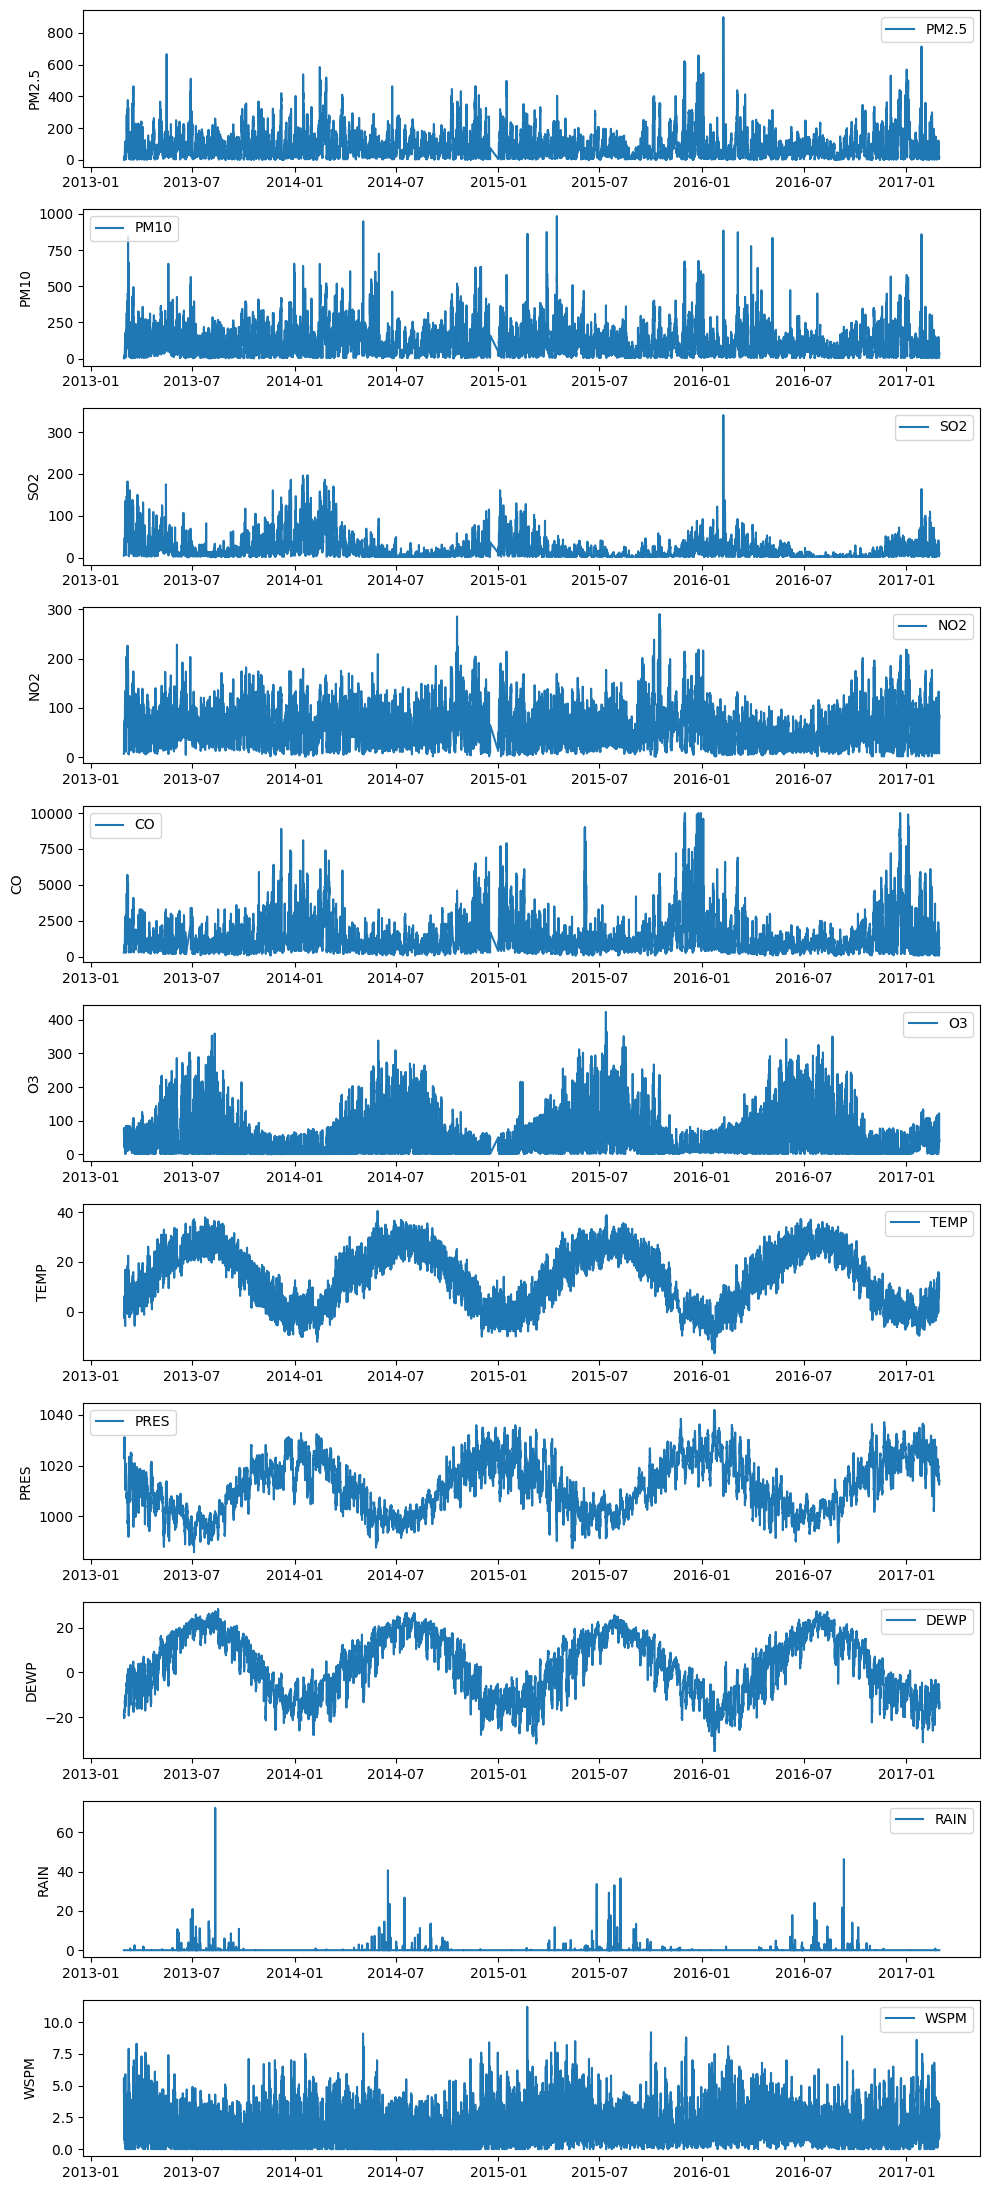

In [39]:
fig, ax = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 2*num_features))
for i, feature in enumerate(features):
    ax[i].plot(df.index, df[feature], label=feature)
    ax[i].set_ylabel(feature)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [40]:
features1 = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP','PRES', 'DEWP', 'RAIN']
num_features = len(features1)
data_monthly = df.iloc[:,:-3].resample('M').mean()

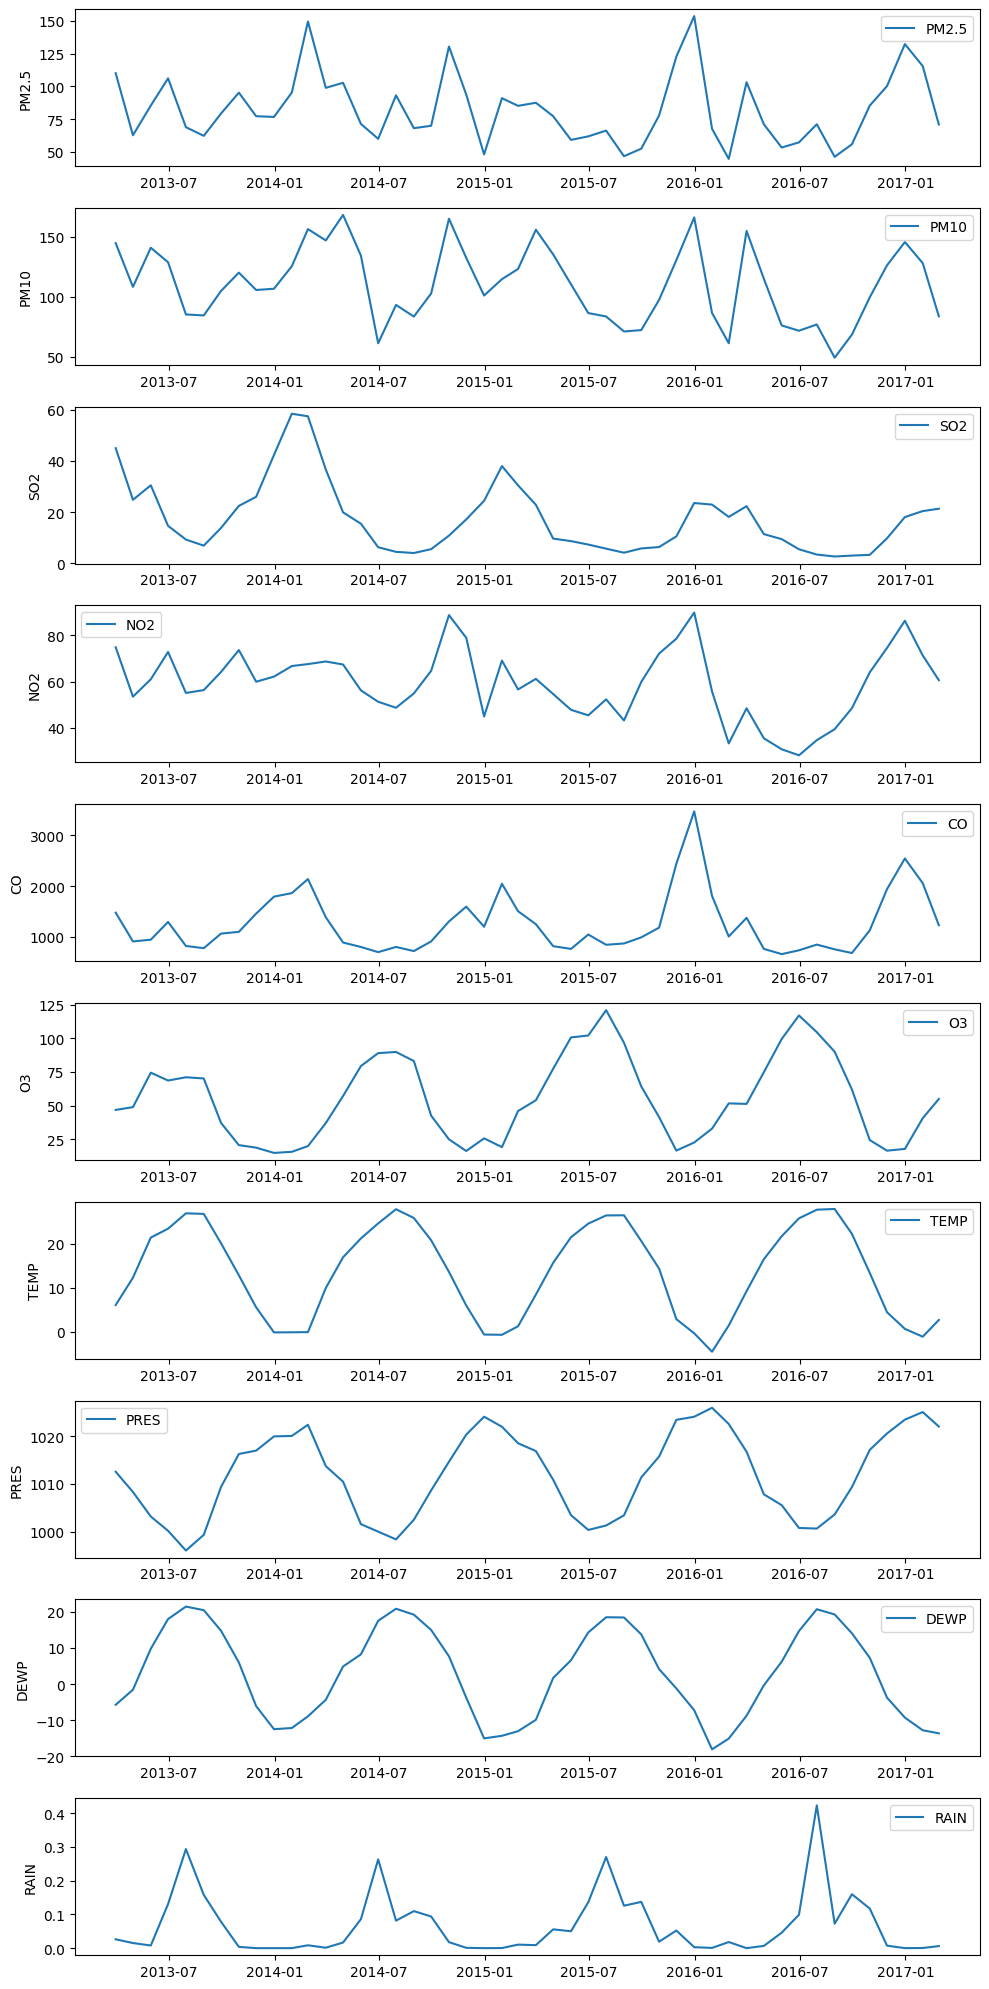

In [41]:
fig, ax = plt.subplots(nrows=num_features, ncols=1, figsize=(10,2*num_features))
for i, feature in enumerate(features1):
    ax[i].plot(data_monthly[feature], label=feature)
    ax[i].set_ylabel(feature)
    ax[i].legend()

plt.tight_layout()
plt.show()

PM2.5 merupakan particulate matter 2.5 micro dan PM10 merupakan particulate matter 10 micro. Berdaasarkan data, dapat diamati bahwa partikel di udara ini memiliki kadar yang identik sepanjang tahun, terlihat bahwa kedua partikel ini memiliki korelasi postif, yaitu berbanding lurus.

Gas polutan seperti, SO2, NO2, CO, dan O3 mengalami fluktuasi data pada kadarnya. Dapat diketahui bahwa gas polutan SO2, NO2, dan CO memiliki korelasi positif yang saling berbanding lurus tetapi memiliki korelasi negatif berbanding terbalik dengan O3.
 
Berdasarkan data di atas diketahui bahwa suhu (TEMP) memiliki korelasi positif yang berbanding lurus dengan kelembaban (DEWP), dan memiliki korelasi negatif yang berbanding terbalik terbalik dengan tekanan udara (PRES). Hujan (RAIN) dapat dipengaruhi oleh parameter-paramter cuaca sepert suhu, kelembaban, tekanan udara, dan kecepatan angin. Dapat terlihat ketika kondisi suhu dan kelembaban rendah, curah hujan juga rendah, begitupun sebaliknya. Hal ini dapat terjadi karena suhu dan kelembaban berkaitan erat dengan proses kondensasi. Sementara itu, tekanan udara rendah memiliki potensi untuk menyebabkan curah hujan yang lebih tinggi dibandingkan dengan tekanan udara yang tinggi, sehingga dapat dikatakan bahwa tekanan udara juga mempengaruhi kondisi cuaca. Akan tetapi, tekanan udara bukanlah satu-satunya faktor. faktor lain sperti suhu, kelembaban, dan kecepatan angin juga berperan dalam menentuakan kondisi suatu cuaca.

In [42]:
wind_direct = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
df.replace({'wd': wind_direct}, inplace=True)

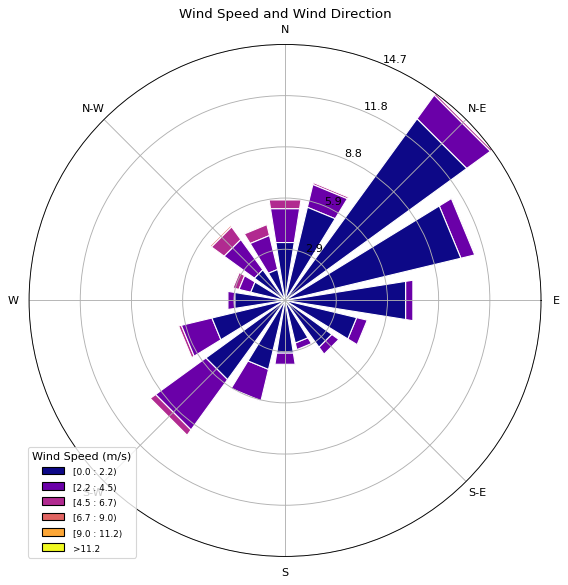

In [43]:
ax = WindroseAxes.from_ax()
ax.bar(df['wd'], df['WSPM'], normed=True, edgecolor='white', cmap=plt.cm.plasma)
ax.set_legend(title="Wind Speed (m/s)")
ax.set_title("Wind Speed and Wind Direction")
plt.show()

Berdasarkan grafik windrose di atas diketahui bahwa angin paling banyak berhembus di arah mata angin timur laut (NE) dengan persentase sebesar 14.7%

### Pertanyaan 1

Bagaimana trend pada polutan dan parameter cuaca di wilayah Aotizhongxin?

### Pertanyaan 2

Bagaimana parameter cuaca mempengaruhi curah hujan di wiliyah Aotizhongxin?

### Conclusion

- Trend pada polutan udara dan parameter cuaca cenderung berubah-ubah sepanjang tahun. Pada polutan udara terlihat data yang didapatkan memiliki fluktuasi yang cukup tinggi, tetapi masih terlihat jelas pola yang dihasilkan sepanjang tahun. Pada parameter cuaca seperti suhu, kelembaban, dan tekanan udara terlihat memiliki pola yang sangat jelas dan grafik yang dihasilkan cenderung berbentuk sinusoidal.


- Berdasarkan analisis terhadap dataset yang melibatkan parameter-parameter seperti suhu (TEMP), kelembaban (DEWP), tekanan udara (PRES), dan hujan (RAIN), dapat diambil beberapa kesimpulan. Pertama, terlihat adanya korelasi positif antara suhu dan kelembaban, yang menunjukkan hubungan berbanding lurus di antara keduanya. Sebaliknya, suhu memiliki korelasi negatif dengan tekanan udara, menandakan hubungan berbanding terbalik antara keduanya.

    Selanjutnya, data menunjukkan bahwa hujan dapat dipengaruhi oleh sejumlah parameter cuaca, seperti suhu, kelembaban, tekanan udara, dan kecepatan angin. Kondisi suhu dan kelembaban yang rendah dapat berhubungan dengan curah hujan yang rendah, dan sebaliknya. Hal ini dapat dijelaskan melalui proses kondensasi yang terkait erat dengan suhu dan kelembaban. Selain itu, terdapat indikasi bahwa tekanan udara rendah memiliki potensi untuk menyebabkan curah hujan yang lebih tinggi dibandingkan dengan tekanan udara tinggi. Meskipun demikian, penting untuk diingat bahwa cuaca adalah fenomena yang kompleks, dan faktor-faktor lain seperti kecepatan angin juga berperan dalam menentukan kondisi cuaca.

Secara keseluruhan, analisis ini menggambarkan hubungan kompleks antara kadar polusi dan parameter cuaca, menekankan pentingnya mempertimbangkan berbagai faktor untuk pemahaman yang lebih baik terkait kondisi kualitas udara dan kondisi cuaca suatu daerah.

In [28]:
df.to_csv("UPDATED_PRSA_Data_Aotizhongxin_20130301-20170228.csv")